In [10]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# which method was best per precinct
voters = pd.read_csv("cleaned_nov_votes.csv")
text_outreach = pd.read_csv("contact methods/TextBanking_Efforts.xlsx - Attempts.csv")
walk_outreach = pd.read_csv("contact methods/total_walk.csv")

# list of voters contacted through phone
phone_outreach = pd.read_csv("contact methods/phone_contacts.csv")
phone_contacts = phone_outreach[phone_outreach["Contact Outcome"] == "Talking to Correct Person"]
phone_contacts.drop_duplicates()
phone_contacts.dropna()
phone_ids = phone_contacts["Voter ID"].values.tolist()

# list of voters contacted through text
text_contacts = pd.read_csv("contact methods/success_text_data.csv")
text_ids = text_contacts["Voter ID"].values.tolist()

# list of voters contacted through walks
walk_contacts = pd.read_csv("contact methods/canvassed_walk.csv")
walk_ids = walk_contacts["VoterID"].values.tolist()


In [12]:
text_voters = voters[voters["Voter ID"].isin(text_ids)]
phone_voter_id = voters["Voter ID"].values.tolist()

phone_contacted_ids = []
for elem in phone_ids:
    if str(elem).isdigit():
        phone_contacted_ids.append(int(elem))

phone_voters = voters[voters["Voter ID"].isin(phone_contacted_ids)]
walk_voters = voters[voters["Voter ID"].isin(walk_ids)]
text_contact_conversion = text_voters.shape[0]/len(text_ids)
text_overall_conversion = text_voters.shape[0]/text_outreach.shape[0]

phone_contact_conversion = phone_voters.shape[0]/len(phone_contacted_ids)
phone_overall_conversion = phone_voters.shape[0]/phone_outreach.shape[0]

walk_contact_conversion = walk_voters.shape[0]/len(walk_ids)
walk_overall_conversion = walk_voters.shape[0]/walk_outreach.shape[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<AxesSubplot:title={'center':'Targeted Voter Turnout vs Age'}, xlabel='age'>

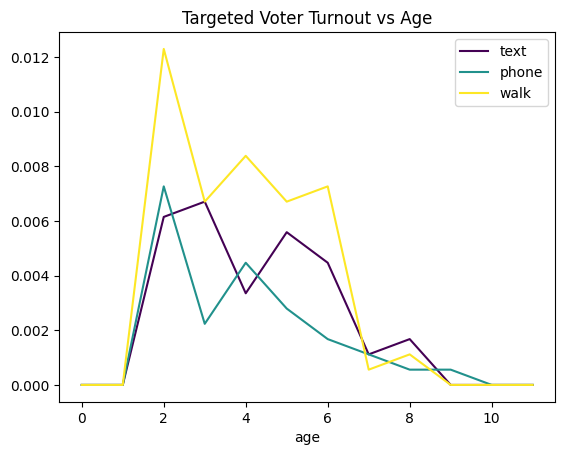

In [64]:
# best method per age:
# dict needs to be of form { age: [0, 1, 2], text: [4, 5, 6], door:[4, 5, 6], phone:}

ages = list(range(0, 12))
print(ages)
age_text = [0]*12
age_phone = [0]*12
age_walk = [0]*12
# update all the ages of text based voters
for idx, row in text_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_text[age] += 1

for idx, row in phone_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_phone[age] += 1

for idx, row in walk_voters.iterrows():
    age = (2022 - row.loc["BIRTHYEAR"])//10
    age_walk[age] += 1

# Normalization might need some changes
# for an overall, add all the indices, add all the stuff to divide by, bam pow (prob in diff graph)
for i in range(12):
    age_phone[i] /= (len(phone_contacted_ids) + len(text_ids) + len(walk_ids))
    age_text[i] /= (len(phone_contacted_ids) + len(text_ids) + len(walk_ids))
    age_walk[i] /= (len(phone_contacted_ids) + len(text_ids) + len(walk_ids))

age_dict = {"age": ages, "text": age_text, "phone": age_phone, "walk": age_walk}
age_data = pd.DataFrame(age_dict)
age_data.plot(x="age", colormap = "viridis", title = "Targeted Voter Turnout vs Age")


[2447, 1864, 1786, 2147, 2601, 2764, 3773, 2056, 2538, 1561, 3911, 3004, 1536, 2003, 2687]
  precincts      text     phone      walk
0         9  0.001635  0.000000  0.001226
1        10  0.000000  0.000000  0.002682
2        11  0.000560  0.000560  0.001120
3        44  0.000932  0.000000  0.001397
4        46  0.000000  0.000769  0.001153


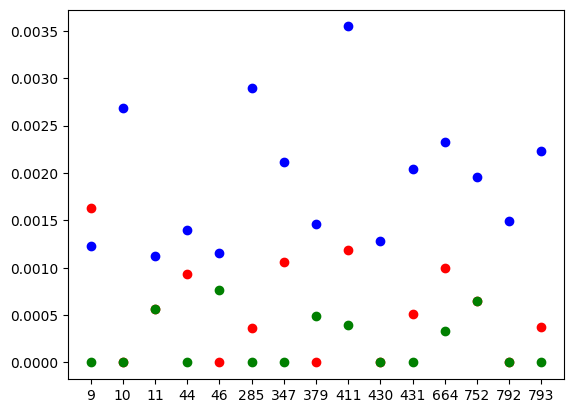

In [63]:
# best method by precinct
precinct_lst = [9, 10, 11, 44, 46, 285, 347, 379, 411, 430, 431, 664, 752, 792, 793]
precinct_lst.sort()

# x axis is a sorted list of the precincts that we hit
# y axis is different colors for turnout for all ages based on whatever methods
# dict looks like {precinctlst = [1, 2, 3], text_voters per precinct}
precinct_text = [0]*len(precinct_lst)
precinct_phone = [0]*len(precinct_lst)
precinct_walk = [0]*len(precinct_lst)
for idx, row in text_voters.iterrows():
    voter_precinct = row.loc["Voting Precinct"]
    if voter_precinct in precinct_lst:
        precinct_text[precinct_lst.index(voter_precinct)] += 1
for idx, row in phone_voters.iterrows():
    voter_precinct = row.loc["Voting Precinct"]
    if voter_precinct in precinct_lst:
        precinct_phone[precinct_lst.index(voter_precinct)] += 1
for idx, row in walk_voters.iterrows():
    voter_precinct = row.loc["Voting Precinct"]
    if voter_precinct in precinct_lst:
        precinct_walk[precinct_lst.index(voter_precinct)] += 1




df_clean_all_registered = pd.read_csv("clean_all_registered.csv")
int_precinct_lst = []
for i in precinct_lst:
    int_precinct_lst.append(int(i))
reg_in_precincts = df_clean_all_registered[df_clean_all_registered["Precinct"].isin(int_precinct_lst)]

reg_by_precinct = [0]*15
for idx, row in reg_in_precincts.iterrows():
    precinct = row.loc["Precinct"]
    reg_by_precinct[int_precinct_lst.index(precinct)] += 1
print(reg_by_precinct)


for i in range(len(precinct_lst)):
    precinct_phone[i] /= reg_by_precinct[i]
    precinct_text[i] /= reg_by_precinct[i]
    precinct_walk[i] /= reg_by_precinct[i]
    precinct_lst[i] = str(precinct_lst[i])

precinct_dict = {"precincts": precinct_lst, "text": precinct_text, "phone": precinct_phone, "walk": precinct_walk}
precinct_data = pd.DataFrame(precinct_dict)
print(precinct_data.head())


plt.scatter(precinct_lst, precinct_text, c="red", label="text")
plt.scatter(precinct_lst, precinct_phone, c="green", label="phone")
plt.scatter(precinct_lst, precinct_walk, c="blue", label="walk")
plt.show()
# precinct_data.plot(kind = "scatter", x="precincts", y = "text", color = "red")
# precinct_data.plot(kind = "scatter", x="precincts", y = "phone", color = "green")
# precinct_data.plot(kind = "scatter", x="precincts", y = "walk", color = "blue")

In [53]:
print(phone_contacts.head())

      Voter ID Date Called Time Called (EST)            Contact Outcome
3   2136761568    10/24/22      12:59 PM EST  Talking to Correct Person
11  2150555717    10/25/22      05:08 PM EST  Talking to Correct Person
13  2145726178    10/25/22      05:13 PM EST  Talking to Correct Person
16  2123166729    10/25/22      05:21 PM EST  Talking to Correct Person
17  2185583493    10/25/22      05:20 PM EST  Talking to Correct Person


[2447, 1864, 1786, 2147, 2601, 2764, 3773, 2056, 2538, 1561, 3911, 3004, 1536, 2003, 2687]
